# Plotting in Python

The most popular plotting library for Python is `matplotlib`, designed to emulate the plotting abilities of Matlab (think **mat**lab **plot**ting **lib**rary). While you may not have any experience with matlab, knowing this can be useful when using online information about the library. 

There are a number of useful references for `matplotlib`, including:

matplotlib example gallery: https://matplotlib.org/gallery/index.html

matplotlib colormaps: https://matplotlib.org/examples/color/colormaps_reference.html

The standard import statement for basic matplotlib usage is

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


keeping to this convention will be helpful for following any tutorials or examples.

## Using Matplotlib for time series data

`matplotlib` allows for quick and easy plotting of basic graph types, such as for time series data. 

Simple plots can be made using the pyplot interface, which works like Matlab and keeps track of every change you make.

In the previous section we imported methane mole fraction data from the Mace Head site using the following syntax:

In [2]:
import pandas as pd
ch4data = pd.read_csv("data/ch4_macehead_2014.csv", index_col="time", parse_dates=True)

Recall that the `mf` is the mole fraction of Methane in $\text{ppb}$ (parts per billion). 
We could then plot this as a time series.

We are now going to import the data slightly differently so that we can work with the time variable.

In [3]:
ch4data = pd.read_csv("data/ch4_macehead_2014.csv", parse_dates=["time"])
print(ch4data)

                    time        mf
0    2014-01-01 00:00:00  0.000002
1    2014-01-01 02:00:00  0.000002
2    2014-01-01 04:00:00  0.000002
3    2014-01-01 06:00:00  0.000002
4    2014-01-01 08:00:00  0.000002
...                  ...       ...
4375 2014-12-31 14:00:00  0.000002
4376 2014-12-31 16:00:00  0.000002
4377 2014-12-31 18:00:00  0.000002
4378 2014-12-31 20:00:00  0.000002
4379 2014-12-31 22:00:00  0.000002

[4380 rows x 2 columns]


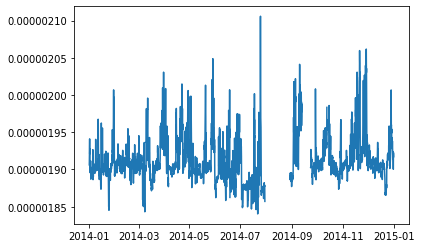

In [4]:
plt.plot(ch4data.time,ch4data.mf)

## More advanced plots

To make more advanced plots, you can create axis objects which can then have features added to them in a similar way to using the `plt.plot(x, y)` function above.

First we tell Python we want a new figure, then we can add several axis or subplots to this figure to be plotted side by side. There are several different ways to do this, below shows one method. 

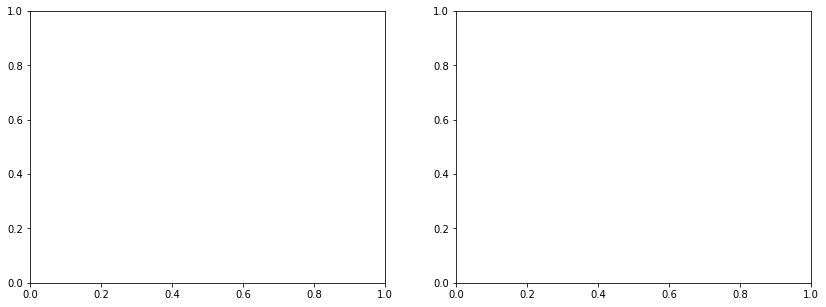

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(14,5))


So what does this mean? We have a `figure` called `fig`, which consists of two subplots and has a size of 12x5 inches. The two subplots are `axs[0]` and `ans[1]`. 

Plot information can now be added to `axs[0]` and `ans[1]` using plotting functions like in the first example. In `axs[0]` we will plot the same plot as above, and in `axs[1]` we will plot a limited range to see more detail in the plot, using the `set_xlim` function (set x axis limits). As the x axis is a time axis, to specify a time we will use the the pandas `datetime` functionality. This allows us to convert a string to a date, by telling `pandas` what format we write the date in - this example uses year-month-day.

We can also highlight what part of `axs[0]` is being shown in `axs[1]` using the `axvspan(left, right)` function.  

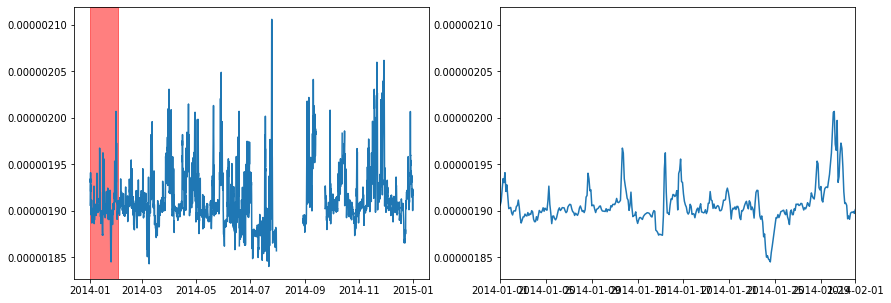

In [6]:
axs[0].plot(ch4data.time, ch4data.mf)
axs[1].plot(ch4data.time, ch4data.mf)

x_min = pd.to_datetime("2014-01-01", format="%Y-%m-%d")
x_max = pd.to_datetime("2014-02-01", format="%Y-%m-%d")

axs[0].axvspan(x_min, x_max, alpha=0.5, color="red")
axs[1].set_xlim([x_min, x_max])

fig

If the figure does not show, replace the last line `fig` with `plt.show()`.

### Exercise

In Spyder, open a new python script file and write code to do the following:
1. Read in netCDF file "AGAGE-GC-FID_MHD_19940101_ch4-10m.nc" from the "data" subdirectory using xarray. This contains time series data which is the same data as has been plotted here but stored in a different format.
2. Use this input to plot time vs mol fraction and reproduce the plots above

### Bonus
- Try looking at different date ranges. *Hint: Either use numpy indexing as before or you can use the xarray Dataset itself and select on the time axis - see http://xarray.pydata.org/en/stable/indexing.html)*

## Extension: Plotting 3 dimensional data 

3-dimensional data can be plotted using `contour` or `contourf` (filled contour) plots, which extrapolate between data points on a regular grid. For these plots, the x and y coordinate inputs must be in a 2D numpy array, the same as the z data. The data you will use will already be in this format so you will not need to worry about this - as long as you get latitude and longitude in the correct order. 

This introduction will generate some math based data to plot, the extension excercise will be to reproduce these plots using the flux data from the previous section. First we will generate something to plot using some numpy functions - you do not need to fully understand this to continue onwards.

In [7]:
import numpy as np

x = np.arange(-np.pi,np.pi,0.1)
y = np.arange(-np.pi,np.pi,0.1)
xx, yy = np.meshgrid(x,y)
z = np.cos(xx) + np.cos(4 * yy)

Producing a contour plot is similar to producing a time series plot, you provide the x coordinates, the y coordinates, then an array with the z value (such as flux) at each point. A 4th input is optional - when given as a single number this tells python how many contours to plot. A list of contour levels can be given instead.

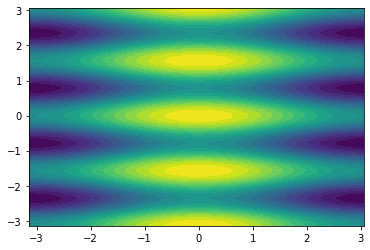

In [8]:
plt.contourf(xx, yy, z, 25)
plt.show()

## Plotting maps with cartopy

This section demonstrates some of the more advanced features available - treat it as a jumping off point if you need to look into creating map based plots. You are encouraged to look at the example gallery given at the top of the page for a large list of example plots which demonstrate how to create just about any plot you would want. 

Cartopy extends matplotlib to allow for geographic data, allowing country borders and latitude/longitude coordinate systems. Cartopy axes must be created in a slightly different way, specifying a map projection to use, telling python how to convert latitude/longitude into x-y coordinates. 

Controlling the axis limits in `cartopy` is handled slightly differently as well - the `set_extent(west, east, south, north)` function is used. 

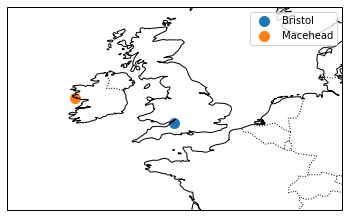

In [12]:
import cartopy
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.coastlines(resolution="50m")

ax.set_extent([-15,10,45,60])

ax.scatter(-2.58, 51.45, label= "Bristol", s=100)
ax.scatter(-9.90, 53.33, label= "Macehead", s=100)
ax.legend()

plt.show()

Plot types available with matplotlib such as contour plots can also be used with the cartopy axis. The map projection used (Plate Carree) is one that gives flat mapping between x-y and latitude-longitude and so is easy to use but makes the polar regions seem much wider than they are. This can be demonstrated by plotting a checkerboard on the Plate Carree projection and a single viewpoint of the globe.

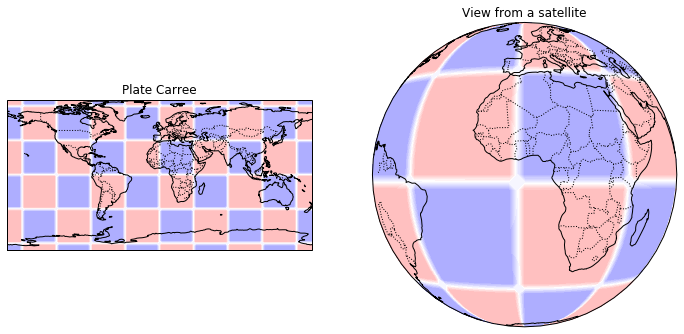

In [13]:
x = np.arange(-180,180,5)
y = np.arange(-90,90,5)
xx, yy = np.meshgrid(x,y)
z = np.sin( ((xx//40.0) + (yy//40.0)) % 2 )

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(1,2,1, projection=cartopy.crs.PlateCarree())

ax1.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax1.coastlines()
ax1.contourf(xx, yy, z, 15, cmap="bwr", vmin=-1.0, vmax=2.0)
ax1.set_title("Plate Carree")

ax2 = fig.add_subplot(1,2,2, projection=cartopy.crs.Geostationary())

ax2.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax2.coastlines()
ax2.contourf(xx, yy, z, 15, cmap="bwr", transform=cartopy.crs.PlateCarree(), vmin=-1.0, vmax=2.0)
ax2.set_title("View from a satellite")

plt.show()

### Bonus:
1. Read in "ch4-anthro_SOUTHAMERICA_2012.nc" file from within the "data" directory as an xarray Dataset. This contains estimated anthropogenic methane emissions for South America from 2012.
2. Extract the flux data variable as a numpy array
3. Extract the latitude and longitude coordinates as numpy arrays.
4. Use this data to plot as a contour map

To view the introduction page containing the list of topics click [here](introduction.ipynb)